In [1]:
import numpy as np
import pandas as pd
import graphviz 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

# нужно разбить цены на данные классы
classes =  [(0, 12000),
           (12000, 46000)]

dataset = pd.read_csv('new_car.csv')
price = dataset[['price']]
categories = []
doneFlag = False
for _, x in price.iterrows():
    for i, c in enumerate(classes):

        if c[0] <= x['price'] < c[1]:
            categories.append(i)
            breakFlag = True
            break

    if doneFlag:
        continue
dataset['Категория'] = categories
# берём колонки которые извлекли в 13 лабе
dataset = dataset[['wheelbase', 'carlength', 'enginesize', 'compressionratio',
       'horsepower', 'Категория']]

In [2]:
dataset.head(100)

,wheelbase,carlength,enginesize,compressionratio,horsepower,Категория
0,88.6,168.8,130,9.0,111,1
1,88.6,168.8,130,9.0,111,1
2,94.5,171.2,152,9.0,154,1
3,99.8,176.6,109,10.0,102,1
4,99.4,176.6,136,8.0,115,1
...,...,...,...,...,...,...
95,107.9,186.7,120,8.4,97,1
96,108.0,186.7,134,7.0,142,1
97,93.7,157.3,90,9.4,68,0
98,93.7,157.3,98,7.6,102,0


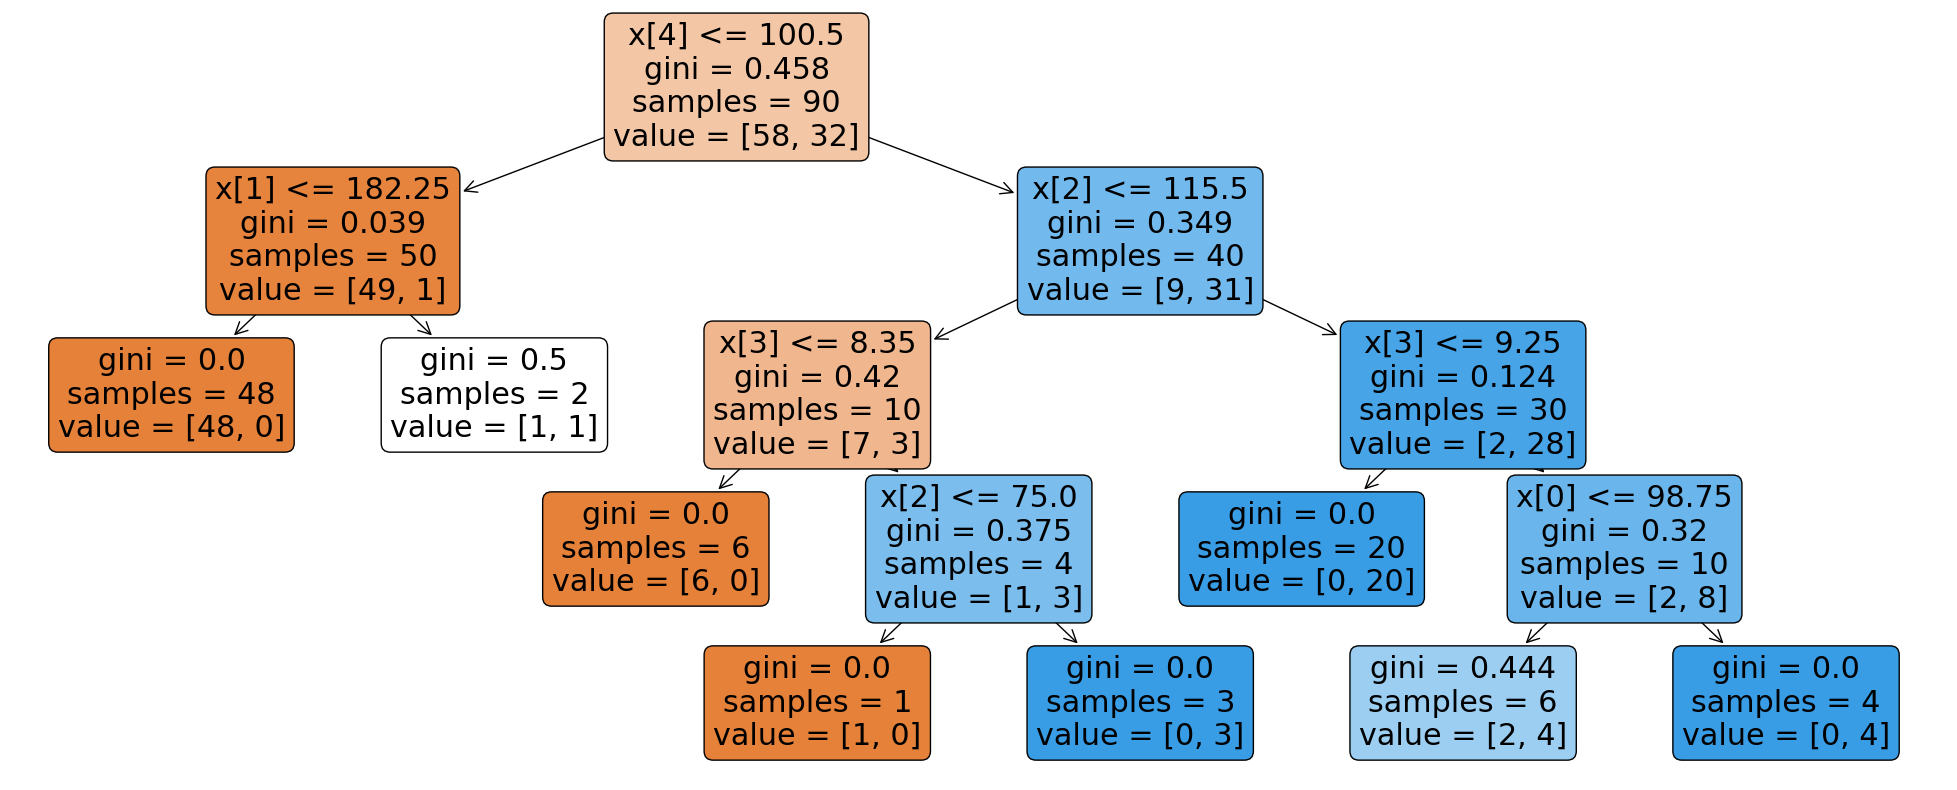

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree# модуль для деревьев
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = dataset[['wheelbase', 'carlength', 'enginesize', 'compressionratio',
       'horsepower']]
y = dataset[['Категория']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) #разбиваем выборку на обучающую и тестовую # тестируем для другой точки

tree = DecisionTreeClassifier(max_depth=4, criterion='gini') # создаем классификатор на основе дерева
clf = tree.fit(X_train, y_train) # обучаем его, т.е. создаем само дерево
plt.figure(figsize=((25,10)))
plot_tree(clf,filled=True,rounded=True)
plt.show()

In [4]:
dot_data = export_graphviz(clf, out_file=None) # конвертируем в DOT (в переменную или в файл) 
graph = graphviz.Source(dot_data)  # загружаем дерево из переменной или файла в представление graphviz
graph.render("car") # отображаем в файл (по умолчанию pdf)

'car.pdf'

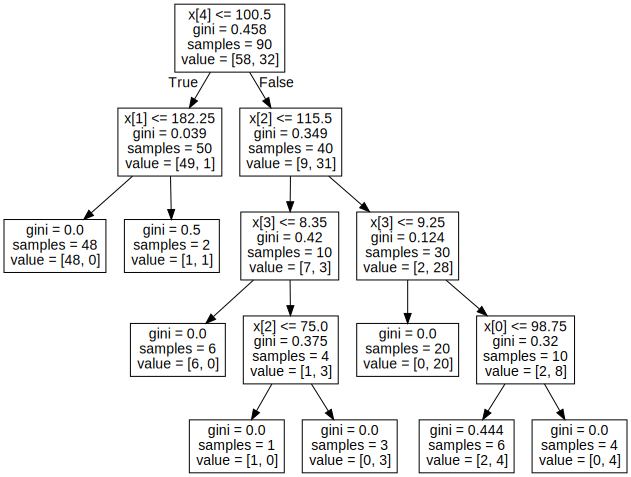

In [5]:
graphviz.Source(dot_data)

In [6]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=X.columns.tolist()) # переводим дерево в текстовую строку
print(r) # печатаем

|--- horsepower <= 100.50
|   |--- carlength <= 182.25
|   |   |--- class: 0
|   |--- carlength >  182.25
|   |   |--- class: 0
|--- horsepower >  100.50
|   |--- enginesize <= 115.50
|   |   |--- compressionratio <= 8.35
|   |   |   |--- class: 0
|   |   |--- compressionratio >  8.35
|   |   |   |--- enginesize <= 75.00
|   |   |   |   |--- class: 0
|   |   |   |--- enginesize >  75.00
|   |   |   |   |--- class: 1
|   |--- enginesize >  115.50
|   |   |--- compressionratio <= 9.25
|   |   |   |--- class: 1
|   |   |--- compressionratio >  9.25
|   |   |   |--- wheelbase <= 98.75
|   |   |   |   |--- class: 1
|   |   |   |--- wheelbase >  98.75
|   |   |   |   |--- class: 1



In [7]:
from sklearn.datasets import make_classification # для генерации данных
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns # для простого отображения
import matplotlib.pyplot as plt #

# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=5,# максимальная глубина дерева
                             n_estimators=10,# число деревьев в лесу
                             max_features=1)# максимальное число признаков для каждого дерева

clf.fit(X_train, y_train) # обучаем 

y_pred = clf.predict(X_test) # проверяем на тестовых данных

score=clf.score(X_test, y_test) # считаем среднюю точность
print(score)

# оценка точности модели
print(metrics.classification_report(y_test, y_pred))
# матрица неточности
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

0.8852459016393442
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.79      0.83      0.81        18

    accuracy                           0.89        61
   macro avg       0.86      0.87      0.86        61
weighted avg       0.89      0.89      0.89        61

[[39  4]
 [ 3 15]]


C:\Users\gross\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0]


Text(0.5, 1.1, 'Confusion matrix decision tree')

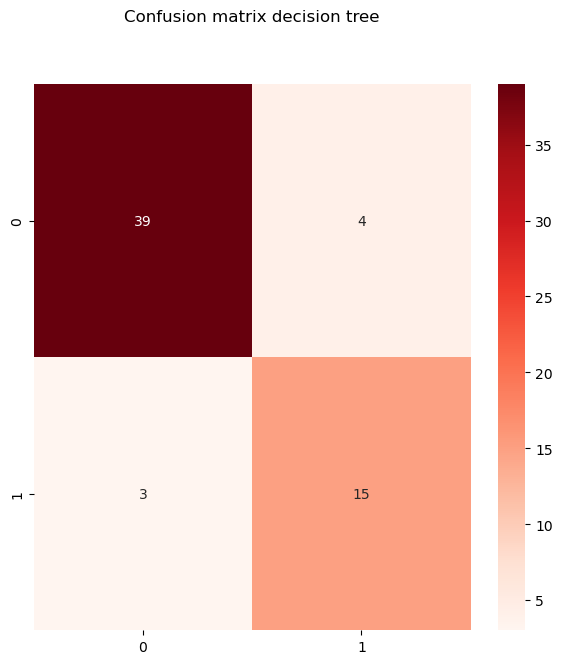

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (6,6))
ax = fig.gca()
# матрица неточности
y_score=clf.predict(X_test)
print(y_score)

cnf_matrix_log = confusion_matrix(y_test, y_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix decision tree', y=1.1)